## Airbnb Effect on housing price in the United States

### Hypothesis:
The short term leasing option on Airbnb contributed to the increase housing price.

### Description:
Airbnb has been launched since 2008. This new and popular short term leasing platform give many house owner a chance to rent their house to tourist in short term. This convenience also lead to other unpredicted situation. Based on recent change in housing market, many researchers started to blame airbnb for contributing to the increasing housing price.

Because housing price can be influenced by many factors, I will choose the airbnb from different type of cities to see the overall influence(Chicago, Boston, Seattle, San Francisco, etc.). For the time period, I will use the last 10 years airbnb data in those specific cities and explore its possible correlation and causation with those cities’ housing price on Zillow.


#### 13 cities at United States who have data on airbnb from 2015-2019
Chicago, Seattle, San Francisco, Los Angelous, Austin, Boston, Nashville, New Orleans, New York City, Oakland, Portland, San Diego, Washington, D.C.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
def get_airbnb_listing(year, city):
    
    url = "/Users/jimmytsai/Downloads/" +  city +  "_" + year + "_listings.csv"
    listing = pd.read_csv(url,',')
    listing = listing[['city','neighbourhood_cleansed','property_type','room_type','beds','price','zipcode']]
    return listing


In [3]:
get_airbnb_listing("2019","Chicago").head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode
0,Chicago,Hyde Park,Condominium,Private room,1.0,$50.00,60637
1,Chicago,South Lawndale,Apartment,Entire home/apt,4.0,$117.00,60608
2,Chicago,Lincoln Park,Condominium,Entire home/apt,4.0,$255.00,60614
3,Chicago,West Town,Apartment,Entire home/apt,1.0,$80.00,60622
4,Chicago,Lincoln Park,Apartment,Entire home/apt,2.0,$150.00,60614
5,Chicago,Hyde Park,Apartment,Private room,1.0,$35.00,60615
6,Chicago,Lincoln Park,Apartment,Entire home/apt,2.0,$215.00,60614
7,Chicago,Near North Side,Condominium,Entire home/apt,1.0,$99.00,60610
8,Chicago,Lincoln Park,Boutique hotel,Private room,1.0,$289.00,60614
9,Chicago,West Town,Apartment,Entire home/apt,2.0,$99.00,60642


In [4]:
def get_all_list_from_airbnb(year_list, city):
    
    home_list = pd.DataFrame() 

    for y in year_list:
        newlist = get_airbnb_listing(str(y), city)
        newlist['year'] = y
        home_list = home_list.append(newlist,ignore_index=True)

    home_list['price'] = home_list['price'].str[1:]
    #home_list['cleaning_fee'] = home_list['cleaning_fee'].str[1:]
    home_list['price'] = home_list['price'].str.replace(',','').astype(float)
    #home_list['cleaning_fee'] = home_list['cleaning_fee'].str.replace(',','').astype(float)
    
    return home_list


In [5]:
chicago_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Chicago")
chicago_list['category']= "chicago"
chicago_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
6,Chicago,Lincoln Square,Apartment,Entire home/apt,5.0,275.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago


In [6]:
chicago_list.dtypes

city                       object
neighbourhood_cleansed     object
property_type              object
room_type                  object
beds                      float64
price                     float64
zipcode                    object
year                        int64
category                   object
dtype: object

In [7]:
# chicago_list['price'] = chicago_list['price'].str[1:]
# chicago_list['cleaning_fee'] = chicago_list['cleaning_fee'].str[1:]
# chicago_list['price'] = chicago_list['price'].str.replace(',','').astype(float)
# chicago_list['cleaning_fee'] = chicago_list['cleaning_fee'].str.replace(',','').astype(float)

In [8]:
chicago_list_agg = chicago_list.groupby('year').agg(['count', 'mean'])
chicago_list_agg

beds           price            
     count      mean count        mean
year                                  
2015  5134  1.641995  5147  149.549252
2017  5204  1.912952  5207  136.210486
2018  6875  2.009164  6877  134.671659
2019  7801  2.129086  7803  143.041907

In [9]:
chicago_1b_apt_list = chicago_list[chicago_list['beds'] == 1.0][chicago_list['room_type'] == "Entire home/apt" ]
chicago_1b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
16,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,85.0,60640,2015,chicago
19,Chicago,Lincoln Square,House,Entire home/apt,1.0,102.0,60640,2015,chicago
21,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
23,Chicago,Lincoln Square,Condominium,Entire home/apt,1.0,110.0,60625,2015,chicago
27,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,150.0,60625,2015,chicago
30,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
35,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,60.0,60625,2015,chicago
39,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,107.0,60625,2015,chicago


In [10]:
chicago_1b_apt_list_agg = chicago_1b_apt_list.groupby('year').agg(['count', 'mean'])
chicago_1b_apt_list_agg

beds      price            
     count mean count        mean
year                             
2015  1230  1.0  1230  144.454472
2017   965  1.0   965  127.753368
2018  1230  1.0  1230  121.067480
2019  1366  1.0  1366  123.987555

In [11]:
chicago_2b_apt_list = chicago_list[chicago_list['beds'] == 2.0][chicago_list['room_type'] == "Entire home/apt" ]
chicago_2b_apt_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
14,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,210.0,60625,2015,chicago
22,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago
24,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
43,Chicago,Lincoln Square,Condominium,Entire home/apt,2.0,150.0,60625,2015,chicago
44,Chicago,Lincoln Square,House,Entire home/apt,2.0,150.0,60625,2015,chicago
57,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,150.0,60625,2015,chicago


In [12]:
chicago_2b_apt_list_agg = chicago_2b_apt_list.groupby('year').agg(['count', 'mean'])
chicago_2b_apt_list_agg

beds      price            
     count mean count        mean
year                             
2015  1050  2.0  1050  198.404762
2017  1061  2.0  1061  168.161169
2018  1333  2.0  1333  158.206302
2019  1571  2.0  1571  154.979631

In [13]:
chicago_private_room_list = chicago_list[chicago_list['room_type'] == "Private room" ]
chicago_private_room_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago
10,Chicago,Lincoln Square,Apartment,Private room,1.0,55.0,60625,2015,chicago
11,Chicago,Lincoln Square,Condominium,Private room,1.0,70.0,60625,2015,chicago
13,Chicago,Lincoln Square,Apartment,Private room,2.0,75.0,60625,2015,chicago
15,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago
17,Chicago,Lincoln Square,Apartment,Private room,1.0,55.0,60625,2015,chicago
20,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago
28,Chicago,Lincoln Square,Apartment,Private room,1.0,60.0,60625,2015,chicago


In [14]:
chicago_private_room_list_agg = chicago_private_room_list.groupby('year').agg(['count', 'mean'])
chicago_private_room_list_agg

beds           price           
     count      mean count       mean
year                                 
2015  1968  1.157012  1972  86.103448
2017  1946  1.234841  1949  71.412519
2018  2432  1.246711  2434  76.237058
2019  2522  1.275971  2524  83.068938

In [15]:
zillow_1b_path = "/Users/jimmytsai/Downloads/Metro_MedianRentalPrice_1Bedroom.csv"
zillow_1b = pd.read_csv(zillow_1b_path,',')
zillow_1b.head(10)

,RegionName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,United States,0,NaN,1200.0,1250.0,1217.5,1250.0,1200.0,1200.0,1047.5,...,1450.0,1463.0,1464.0,1450.0,1440.0,1434.0,1444.0,1450.0,1465.0,1480.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2195.0,2180.0,2180.0,2160.0,2108.0,2100.0,2100.0,2100.0,2100.0,2150.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1375.0,1425.0,1425.0,1412.5,1530.0,1600.0,1388.0,...,2035.0,2055.0,2095.0,2088.5,2105.0,2110.0,2104.0,2095.0,2109.0,2125.0
3,"Chicago, IL",3,NaN,1050.0,1107.5,1050.0,1095.0,995.0,950.0,1095.0,...,1495.0,1500.0,1502.0,1500.0,1495.0,1523.0,1540.0,1582.0,1595.0,1595.0
4,"Dallas-Fort Worth, TX",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,...,1255.0,1268.0,1266.0,1267.0,1289.0,1290.0,1275.5,1270.0,1276.0,1275.0
5,"Philadelphia, PA",5,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,899.0,...,1345.0,1350.0,1345.0,1348.0,1321.0,1350.0,1350.0,1355.0,1395.0,1400.0
6,"Houston, TX",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1225.0,1225.0,1221.0,1214.0,1200.0,1200.0,1195.0,1192.0,1195.0,1234.0
7,"Washington, DC",7,NaN,1300.0,1425.0,1400.0,1400.0,1400.0,1392.0,1450.0,...,1800.0,1800.0,1829.0,1800.0,1806.0,1807.0,1835.0,1850.0,1832.0,1850.0
8,"Miami-Fort Lauderdale, FL",8,1300.0,1300.0,1300.0,1275.0,1300.0,1200.0,1200.0,1312.5,...,1650.0,1650.0,1650.0,1655.0,1658.0,1658.0,1650.0,1650.0,1658.0,1650.0
9,"Atlanta, GA",9,1000.0,995.0,1000.0,1000.0,1075.0,1050.0,995.0,950.0,...,1290.0,1329.0,1350.0,1328.0,1395.5,1392.0,1393.0,1400.0,1410.0,1426.0


In [16]:
new_zillow_1b = zillow_1b[(zillow_1b['RegionName'] == "Chicago, IL") | (zillow_1b['RegionName'] == "New York, NY")| (zillow_1b['RegionName'] == "Washington, DC") |(zillow_1b['RegionName'] == "Boston, MA") |(zillow_1b['RegionName'] == "San Francisco, CA") |(zillow_1b['RegionName'] == "Seattle, WA") |(zillow_1b['RegionName'] == "Portland, OR") |(zillow_1b['RegionName'] == "Austin, TX") |(zillow_1b['RegionName'] == "Nashville, TN")|(zillow_1b['RegionName'] == "New Orleans, LA")|(zillow_1b['RegionName'] == "San Diego, CA")|(zillow_1b['RegionName'] == "Los Angeles-Long Beach-Anaheim, CA")][['RegionName','2015-06','2016-06','2017-06','2018-06','2019-03']]
new_zillow_1b

,RegionName,2015-06,2016-06,2017-06,2018-06,2019-03
1,"New York, NY",2200.0,2200.0,2195.0,2195.0,2150.0
2,"Los Angeles-Long Beach-Anaheim, CA",1725.0,1850.0,1968.5,2035.0,2125.0
3,"Chicago, IL",1395.0,1425.0,1425.0,1495.0,1595.0
7,"Washington, DC",1750.0,1735.0,1795.0,1800.0,1850.0
10,"Boston, MA",1975.0,1995.0,1995.0,2090.0,2100.0
11,"San Francisco, CA",2549.5,2700.0,2718.0,2631.0,2795.0
15,"Seattle, WA",1545.0,1664.0,1850.0,1865.0,1826.5
17,"San Diego, CA",1617.5,1620.0,1771.0,1920.0,1855.0
23,"Portland, OR",1230.0,1395.0,1390.0,1395.0,1395.0
35,"Austin, TX",985.0,1070.0,1090.0,1169.0,1221.0


In [17]:
new_zillow_1b = new_zillow_1b.set_index('RegionName')
new_zillow_1b

,2015-06,2016-06,2017-06,2018-06,2019-03
RegionName,,,,,
"New York, NY",2200.0,2200.0,2195.0,2195.0,2150.0
"Los Angeles-Long Beach-Anaheim, CA",1725.0,1850.0,1968.5,2035.0,2125.0
"Chicago, IL",1395.0,1425.0,1425.0,1495.0,1595.0
"Washington, DC",1750.0,1735.0,1795.0,1800.0,1850.0
"Boston, MA",1975.0,1995.0,1995.0,2090.0,2100.0
"San Francisco, CA",2549.5,2700.0,2718.0,2631.0,2795.0
"Seattle, WA",1545.0,1664.0,1850.0,1865.0,1826.5
"San Diego, CA",1617.5,1620.0,1771.0,1920.0,1855.0
"Portland, OR",1230.0,1395.0,1390.0,1395.0,1395.0


In [18]:
new_zillow_1b = new_zillow_1b.T
new_zillow_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015-06,2200.0,1725.0,1395.0,1750.0,1975.0,2549.5,1545.0,1617.5,1230.0,985.0,1100.0,1150.0
2016-06,2200.0,1850.0,1425.0,1735.0,1995.0,2700.0,1664.0,1620.0,1395.0,1070.0,1397.0,1195.0
2017-06,2195.0,1968.5,1425.0,1795.0,1995.0,2718.0,1850.0,1771.0,1390.0,1090.0,1410.0,1150.0
2018-06,2195.0,2035.0,1495.0,1800.0,2090.0,2631.0,1865.0,1920.0,1395.0,1169.0,1380.0,1095.0
2019-03,2150.0,2125.0,1595.0,1850.0,2100.0,2795.0,1826.5,1855.0,1395.0,1221.0,1393.0,1087.0


In [19]:
# new_zillow_1b.plot()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

In [20]:
seattle_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Seattle")
seattle_list['category']= "seattle"
seattle_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Seattle,Belltown,Apartment,Private room,1.0,59.0,98121,2015,seattle
1,Seattle,Belltown,Apartment,Shared room,1.0,45.0,98121,2015,seattle
2,Seattle,Belltown,Apartment,Entire home/apt,2.0,225.0,98121,2015,seattle
3,Seattle,Belltown,Apartment,Entire home/apt,1.0,200.0,98121,2015,seattle
4,Seattle,First Hill,Apartment,Shared room,1.0,74.0,98104,2015,seattle
5,Seattle,North Beacon Hill,House,Shared room,1.0,30.0,98144,2015,seattle
6,Seattle,Phinney Ridge,Apartment,Shared room,1.0,37.0,98103,2015,seattle
7,Seattle,Broadway,Apartment,Shared room,1.0,25.0,98122,2015,seattle
8,Seattle,Broadway,House,Shared room,1.0,46.0,98102,2015,seattle
9,Seattle,Broadway,House,Shared room,1.0,55.0,98122,2015,seattle


In [21]:
sanfrancisco_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Sanfrancisco")
sanfrancisco_list['category']= "sanfrancisco"
sanfrancisco_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,San Francisco,Castro/Upper Market,House,Entire home/apt,2.0,250.0,94114,2015,sanfrancisco
1,San Francisco,Inner Richmond,Apartment,Private room,1.0,89.0,94118,2015,sanfrancisco
2,San Francisco,South of Market,Apartment,Private room,1.0,164.0,94103,2015,sanfrancisco
3,San Francisco,Nob Hill,Apartment,Entire home/apt,2.0,170.0,94109,2015,sanfrancisco
4,San Francisco,Potrero Hill,Apartment,Entire home/apt,2.0,185.0,94107,2015,sanfrancisco
5,San Francisco,Pacific Heights,Apartment,Private room,1.0,135.0,94115,2015,sanfrancisco
6,San Francisco,South of Market,Loft,Shared room,1.0,70.0,94103,2015,sanfrancisco
7,San Francisco,Nob Hill,Apartment,Entire home/apt,1.0,125.0,94109,2015,sanfrancisco
8,San Francisco,Nob Hill,Apartment,Entire home/apt,1.0,140.0,94109,2015,sanfrancisco
9,San Francisco,Nob Hill,Apartment,Private room,1.0,69.0,94133,2015,sanfrancisco


In [22]:
losangeles_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Losangeles")
losangeles_list['category']= "losangeles"

losangeles_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Los Angeles,Venice,Apartment,Entire home/apt,2.0,145.0,90291,2015,losangeles
1,Los Angeles,Venice,Apartment,Entire home/apt,2.0,175.0,90291,2015,losangeles
2,Rancho Palos Verdes,Rancho Palos Verdes,Villa,Private room,1.0,295.0,90275,2015,losangeles
3,Los Angeles,Hollywood,Condominium,Private room,1.0,110.0,90028,2015,losangeles
4,Santa Monica,Venice,Loft,Entire home/apt,2.0,600.0,90405,2015,losangeles
5,Los Angeles,Hollywood,House,Entire home/apt,1.0,95.0,90046,2015,losangeles
6,Los Angeles,West Hollywood,House,Private room,1.0,90.0,90046,2015,losangeles
7,Los Angeles,Beverly Grove,House,Entire home/apt,3.0,274.0,90048,2015,losangeles
8,North Hollywood,North Hollywood,Apartment,Entire home/apt,4.0,99.0,91601,2015,losangeles
9,Venice,Venice,Apartment,Entire home/apt,2.0,159.0,90291,2015,losangeles


In [23]:
austin_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Austin")
austin_list['category']= "austin"
austin_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Austin,78704,Apartment,Entire home/apt,2.0,425.0,78704,2015,austin
1,Austin,78704,House,Entire home/apt,4.0,574.0,78704,2015,austin
2,Austin,78704,House,Private room,1.0,150.0,78704,2015,austin
3,Austin,78704,House,Private room,1.0,99.0,78704,2015,austin
4,Austin,78704,House,Entire home/apt,2.0,185.0,78704,2015,austin
5,Austin,78704,House,Entire home/apt,4.0,130.0,78704,2015,austin
6,Austin,78704,House,Private room,1.0,185.0,78704,2015,austin
7,Austin,78704,House,Entire home/apt,1.0,139.0,78704,2015,austin
8,Austin,78704,House,Entire home/apt,3.0,500.0,78704,2015,austin
9,Austin,78724,House,Entire home/apt,3.0,289.0,78724,2015,austin


In [24]:
boston_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Boston")
boston_list['category']= "boston"
boston_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Boston,Roslindale,House,Private room,1.0,62.0,02131,2015,boston
1,Boston,Roslindale,Apartment,Private room,1.0,65.0,02131,2015,boston
2,Boston,Roslindale,Apartment,Private room,1.0,75.0,02131,2015,boston
3,Boston,Roslindale,House,Entire home/apt,2.0,110.0,02131,2015,boston
4,Boston,Roslindale,House,Private room,1.0,75.0,02131,2015,boston
5,Boston,Roslindale,Apartment,Private room,1.0,70.0,02131,2015,boston
6,Boston,Roslindale,House,Private room,1.0,49.0,02131,2015,boston
7,Boston,Roslindale,Apartment,Private room,1.0,50.0,02131,2015,boston
8,Boston,Roslindale,Apartment,Private room,1.0,60.0,02131,2015,boston
9,Boston,Roslindale,Villa,Private room,1.0,40.0,02131,2015,boston


In [25]:
nashville_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Nashville")
nashville_list['category']= "nashville"
nashville_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Nashville,District 1,House,Private room,1.0,54.0,37218,2015,nashville
1,Nashville,District 1,Cabin,Entire home/apt,1.0,350.0,37080,2015,nashville
2,Nashville,District 1,House,Entire home/apt,8.0,510.0,37218,2015,nashville
3,Nashville,District 1,House,Private room,1.0,45.0,37218,2015,nashville
4,Nashville,District 1,House,Private room,1.0,150.0,37218,2015,nashville
5,Nashville,District 1,House,Entire home/apt,1.0,125.0,37080,2015,nashville
6,Nashville,District 1,House,Entire home/apt,2.0,290.0,37218,2015,nashville
7,Nashville,District 1,House,Entire home/apt,4.0,108.0,37218,2015,nashville
8,Nashville,District 1,House,Entire home/apt,9.0,202.0,37218,2015,nashville
9,Nashville,District 1,Bed & Breakfast,Entire home/apt,4.0,85.0,37080,2015,nashville


In [26]:
neworleans_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Neworleans")
neworleans_list['category']= "neworleans"
neworleans_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,New Orleans,Algiers Point,Apartment,Entire home/apt,4.0,85.0,70114,2015,neworleans
1,New Orleans,City Park,House,Entire home/apt,1.0,125.0,70119,2015,neworleans
2,New Orleans,City Park,Apartment,Entire home/apt,2.0,200.0,70119,2015,neworleans
3,New Orleans,City Park,House,Entire home/apt,4.0,150.0,70119,2015,neworleans
4,New Orleans,City Park,House,Entire home/apt,3.0,215.0,70119,2015,neworleans
5,New Orleans,City Park,Loft,Entire home/apt,1.0,125.0,70119,2015,neworleans
6,New Orleans,City Park,Apartment,Entire home/apt,3.0,142.0,70119,2015,neworleans
7,New Orleans,City Park,Apartment,Entire home/apt,1.0,500.0,70124,2015,neworleans
8,New Orleans,Desire Area,House,Shared room,1.0,100.0,70117,2015,neworleans
9,New Orleans,Desire Area,House,Private room,1.0,125.0,70126,2015,neworleans


In [27]:
newyork_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Newyork")
newyork_list['category']= "newyork"
newyork_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,New York,Midtown East,Apartment,Entire home/apt,1.0,160.0,10022,2015,newyork
1,New York,Hamilton Heights,Apartment,Entire home/apt,3.0,105.0,NaN,2015,newyork
2,Brooklyn,Bushwick,Apartment,Private room,2.0,58.0,11221,2015,newyork
3,New York,West Village,Apartment,Entire home/apt,1.0,185.0,10011,2015,newyork
4,New York,Chelsea,Apartment,Entire home/apt,2.0,195.0,10011,2015,newyork
5,Brooklyn,Carroll Gardens,Apartment,Entire home/apt,3.0,165.0,11231,2015,newyork
6,Brooklyn,Bushwick,Apartment,Private room,1.0,80.0,11207,2015,newyork
7,New York,Chinatown,Apartment,Private room,1.0,120.0,10013,2015,newyork
8,New York,East Village,Apartment,Entire home/apt,2.0,150.0,10003,2015,newyork
9,Brooklyn,Bedford-Stuyvesant,Apartment,Shared room,1.0,40.0,11221,2015,newyork


In [28]:
oakland_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Oakland")
oakland_list['category']= "oakland"
oakland_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Oakland,Northgate,Apartment,Shared room,1.0,45.0,94612,2015,oakland
1,Oakland,Bushrod,House,Shared room,1.0,38.0,94609,2015,oakland
2,Oakland,Longfellow,House,Shared room,1.0,35.0,94608,2015,oakland
3,Emeryville,Clawson,Apartment,Shared room,1.0,200.0,94608,2015,oakland
4,Oakland,Merritt,Apartment,Shared room,4.0,50.0,94606,2015,oakland
5,Oakland,Patten,Apartment,Shared room,2.0,55.0,94601,2015,oakland
6,Oakland,Bartlett,House,Shared room,3.0,65.0,94601,2015,oakland
7,Oakland,Reservoir Hill-Meadow Brook,House,Shared room,8.0,42.0,94601,2015,oakland
8,Oakland,Reservoir Hill-Meadow Brook,House,Shared room,8.0,42.0,94601,2015,oakland
9,Oakland,Lakewide,Apartment,Shared room,1.0,49.0,94612,2015,oakland


In [29]:
portland_list = get_all_list_from_airbnb([2015,2016,2017,2018,2019],"Portland")
portland_list['category']= "portland"
portland_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Portland,Ashcreek/Crestwood,House,Private room,1.0,67.0,97219,2015,portland
1,Portland,Sabin/Irvington,House,Private room,1.0,79.0,97212,2015,portland
2,Portland,Bridlemile/Southwest Hills,Apartment,Entire home/apt,3.0,250.0,97221,2015,portland
3,Portland,Sylvan-Highlands,House,Entire home/apt,1.0,95.0,97221,2015,portland
4,Portland,Eastmoreland/Reed,Dorm,Shared room,1.0,17.0,97202,2015,portland
5,Portland,Hillside/Northwest District,Apartment,Entire home/apt,2.0,122.0,97210,2015,portland
6,Portland,Goose Hollow/Southwest Hills,Apartment,Entire home/apt,1.0,87.0,97201,2015,portland
7,Portland,Lents,Other,Private room,2.0,39.0,97266,2015,portland
8,Portland,Hillside/Northwest District,House,Entire home/apt,2.0,160.0,97210,2015,portland
9,Portland,Alameda/Irvington,House,Private room,2.0,55.0,97212,2015,portland


In [30]:
sandiego_list = get_all_list_from_airbnb([2015,2016,2018,2019],"Sandiego")
sandiego_list['category']= "sandiego"
sandiego_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,San Diego,La Jolla,Apartment,Entire home/apt,3.0,340.0,92109,2015,sandiego
1,San Diego,Grantville,House,Private room,1.0,50.0,92120,2015,sandiego
2,San Diego,San Carlos,House,Private room,1.0,58.0,92120,2015,sandiego
3,San Diego,San Carlos,Other,Private room,1.0,85.0,92120,2015,sandiego
4,San Diego,Del Cerro,House,Private room,1.0,56.0,92120,2015,sandiego
5,San Diego,Del Cerro,House,Private room,3.0,60.0,92120,2015,sandiego
6,San Diego,San Carlos,House,Private room,1.0,50.0,92120,2015,sandiego
7,San Diego,San Carlos,House,Private room,1.0,100.0,92120,2015,sandiego
8,San Diego,Allied Gardens,House,Private room,1.0,80.0,92124,2015,sandiego
9,San Diego,San Carlos,House,Private room,3.0,105.0,92120,2015,sandiego


In [31]:
washington_list = get_all_list_from_airbnb([2015,2017,2018,2019],"Washington")
washington_list['category']= "washington"
washington_list.head(10)

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Washington,"Capitol Hill, Lincoln Park",House,Entire home/apt,2.0,160.0,20003,2015,washington
1,Washington,"Capitol Hill, Lincoln Park",House,Entire home/apt,3.0,350.0,20003,2015,washington
2,Hyattsville,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",House,Private room,1.0,50.0,20782,2015,washington
3,Washington,"Southwest Employment Area, Southwest/Waterfron...",House,Private room,1.0,95.0,20024,2015,washington
4,Silver Spring,"Colonial Village, Shepherd Park, North Portal ...",Townhouse,Entire home/apt,1.0,50.0,20910,2015,washington
5,Washington,"Southwest Employment Area, Southwest/Waterfron...",Boat,Entire home/apt,4.0,99.0,20024,2015,washington
6,Washington,"Takoma, Brightwood, Manor Park",Condominium,Entire home/apt,2.0,100.0,20012,2015,washington
7,Mount Rainier,"Woodridge, Fort Lincoln, Gateway",Apartment,Entire home/apt,1.0,100.0,20712,2015,washington
8,Capitol Heights,"Capitol View, Marshall Heights, Benning Heights",House,Private room,1.0,38.0,20743,2015,washington
9,Takoma Park,"Takoma, Brightwood, Manor Park",Bed & Breakfast,Private room,1.0,71.0,20912,2015,washington


In [32]:
total_city_list = pd.DataFrame() 
total_city_list = total_city_list.append([chicago_list,seattle_list,sanfrancisco_list,losangeles_list,austin_list,boston_list,nashville_list,neworleans_list,newyork_list,oakland_list,portland_list,sandiego_list,washington_list],ignore_index=True)


In [33]:
total_city_list

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
0,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,142.0,60625,2015,chicago
1,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,120.0,60625,2015,chicago
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
3,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,125.0,60625,2015,chicago
4,Chicago,Lincoln Square,Apartment,Private room,1.0,75.0,60625,2015,chicago
5,Chicago,Lincoln Square,House,Private room,1.0,95.0,60618,2015,chicago
6,Chicago,Lincoln Square,Apartment,Entire home/apt,5.0,275.0,60625,2015,chicago
7,Chicago,Lincoln Square,Apartment,Entire home/apt,2.0,175.0,60640,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
9,Chicago,Lincoln Square,Apartment,Private room,1.0,80.0,60625,2015,chicago


In [34]:
total_1b_apt_list = total_city_list[total_city_list['beds'] == 1.0][total_city_list['room_type'] == "Entire home/apt" ]


In [35]:
count_trend = total_1b_apt_list.groupby(['category','year'])['price'].agg('count').unstack()
count_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,933.0,NaN,1728.0,1945.0,2169.0
boston,689.0,905.0,1171.0,1426.0,1525.0
chicago,1230.0,NaN,965.0,1230.0,1366.0
losangeles,3834.0,4920.0,6833.0,8626.0,9534.0
nashville,261.0,421.0,560.0,708.0,748.0
neworleans,543.0,780.0,1040.0,1061.0,1210.0
newyork,8414.0,9887.0,9761.0,11037.0,11728.0
oakland,295.0,416.0,NaN,699.0,721.0
portland,468.0,697.0,824.0,1109.0,1276.0


In [36]:
price_trend = total_1b_apt_list.groupby(['category','year'])['price'].agg('mean').unstack()
price_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,202.395498,NaN,196.652199,182.682262,170.627017
boston,199.114659,184.434254,182.962425,210.654278,183.331803
chicago,144.454472,NaN,127.753368,121.067480,123.987555
losangeles,142.575639,138.466667,140.489829,138.369001,137.683868
nashville,134.559387,119.828979,139.953571,160.283898,183.536096
neworleans,159.173112,156.820513,142.842308,125.654100,136.004959
newyork,182.069170,172.188227,168.429054,165.793694,171.005798
oakland,112.077966,122.009615,NaN,117.937053,121.030513
portland,105.878205,107.220947,106.861650,104.895401,100.358934


In [37]:
count_pct_trend = count_trend.pct_change(axis='columns',fill_method = 'pad')
count_pct_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,NaN,0.000000,0.852090,0.125579,0.115167
boston,NaN,0.313498,0.293923,0.217763,0.069425
chicago,NaN,0.000000,-0.215447,0.274611,0.110569
losangeles,NaN,0.283255,0.388821,0.262403,0.105263
nashville,NaN,0.613027,0.330166,0.264286,0.056497
neworleans,NaN,0.436464,0.333333,0.020192,0.140434
newyork,NaN,0.175065,-0.012744,0.130724,0.062608
oakland,NaN,0.410169,0.000000,0.680288,0.031474
portland,NaN,0.489316,0.182209,0.345874,0.150586


In [38]:
price_pct_trend = price_trend.pct_change(axis='columns',fill_method = 'pad')
price_pct_trend

year,2015,2016,2017,2018,2019
category,,,,,
austin,NaN,0.000000,-0.028377,-0.071039,-0.065990
boston,NaN,-0.073728,-0.007980,0.151353,-0.129703
chicago,NaN,0.000000,-0.115615,-0.052334,0.024119
losangeles,NaN,-0.028820,0.014611,-0.015096,-0.004951
nashville,NaN,-0.109471,0.167944,0.145265,0.145069
neworleans,NaN,-0.014780,-0.089135,-0.120330,0.082376
newyork,NaN,-0.054270,-0.021832,-0.015647,0.031437
oakland,NaN,0.088614,0.000000,-0.033379,0.026230
portland,NaN,0.012682,-0.003351,-0.018400,-0.043248


In [39]:
price_trend = price_trend.T
price_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,202.395498,199.114659,144.454472,142.575639,134.559387,159.173112,182.069170,112.077966,105.878205,178.842795,211.564940,134.357702,134.439149
2016,NaN,184.434254,NaN,138.466667,119.828979,156.820513,172.188227,122.009615,107.220947,146.159966,229.749308,116.107376,NaN
2017,196.652199,182.962425,127.753368,140.489829,139.953571,142.842308,168.429054,NaN,106.861650,NaN,234.531710,NaN,199.610438
2018,182.682262,210.654278,121.067480,138.369001,160.283898,125.654100,165.793694,117.937053,104.895401,138.035325,173.215962,134.294521,173.833904
2019,170.627017,183.331803,123.987555,137.683868,183.536096,136.004959,171.005798,121.030513,100.358934,138.181941,176.269074,138.392263,157.898224


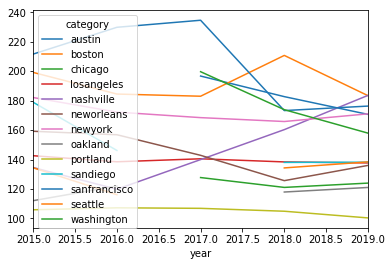

In [40]:
price_trend.plot()


In [41]:
count_trend = count_trend.T
count_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,933.0,689.0,1230.0,3834.0,261.0,543.0,8414.0,295.0,468.0,687.0,1409.0,766.0,1175.0
2016,NaN,905.0,NaN,4920.0,421.0,780.0,9887.0,416.0,697.0,1169.0,1807.0,1071.0,NaN
2017,1728.0,1171.0,965.0,6833.0,560.0,1040.0,9761.0,NaN,824.0,NaN,1971.0,NaN,2146.0
2018,1945.0,1426.0,1230.0,8626.0,708.0,1061.0,11037.0,699.0,1109.0,1925.0,852.0,2336.0,2336.0
2019,2169.0,1525.0,1366.0,9534.0,748.0,1210.0,11728.0,721.0,1276.0,2226.0,1717.0,2585.0,2309.0


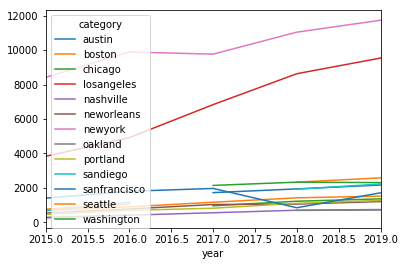

In [42]:
count_trend.plot()

### Calculate percentage change based on the first year's value

In [43]:
new_zillow_pct_trend_1b = new_zillow_1b.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
new_zillow_pct_trend_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06,0.000000,7.246377,2.150538,-0.857143,1.012658,5.903118,7.702265,0.154560,13.414634,8.629442,27.000000,3.913043
2017-06,-0.227273,14.115942,2.150538,2.571429,1.012658,6.609139,19.741100,9.489954,13.008130,10.659898,28.181818,0.000000
2018-06,-0.227273,17.971014,7.168459,2.857143,5.822785,3.196705,20.711974,18.701700,13.414634,18.680203,25.454545,-4.782609
2019-03,-2.272727,23.188406,14.336918,5.714286,6.329114,9.629339,18.220065,14.683153,13.414634,23.959391,26.636364,-5.478261


In [44]:
# new_zillow_pct_trend_1b.columns = ['newyork', 'losangeles', 'chicago','washington','boston','sanfrancisco','seattle','sandiego','portland','austin','nashville','neworleans']
# new_zillow_pct_trend_1b

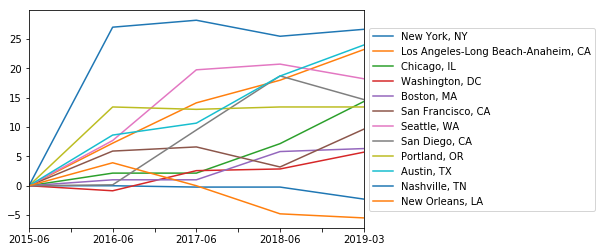

In [45]:
new_zillow_pct_trend_1b.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
count_percentage_trend = count_trend.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
count_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,NaN,31.349782,NaN,28.325509,61.302682,43.646409,17.506537,41.016949,48.931624,70.160116,28.246984,39.817232,NaN
2017,85.209003,69.956459,-21.544715,78.221179,114.559387,91.528545,16.009033,NaN,76.068376,NaN,39.886444,NaN,82.638298
2018,108.467310,106.966618,0.000000,124.986959,171.264368,95.395948,31.174233,136.949153,136.965812,180.203785,-39.531583,204.960836,98.808511
2019,132.475884,121.335269,11.056911,148.669797,186.590038,122.836096,39.386736,144.406780,172.649573,224.017467,21.859475,237.467363,96.510638


In [47]:
count_percentage_trend = count_percentage_trend.fillna((count_percentage_trend.shift() + count_percentage_trend.shift(-1))/2)
count_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,42.604502,31.349782,-10.772358,28.325509,61.302682,43.646409,17.506537,41.016949,48.931624,70.160116,28.246984,39.817232,41.319149
2017,85.209003,69.956459,-21.544715,78.221179,114.559387,91.528545,16.009033,88.983051,76.068376,125.181951,39.886444,122.389034,82.638298
2018,108.467310,106.966618,0.000000,124.986959,171.264368,95.395948,31.174233,136.949153,136.965812,180.203785,-39.531583,204.960836,98.808511
2019,132.475884,121.335269,11.056911,148.669797,186.590038,122.836096,39.386736,144.406780,172.649573,224.017467,21.859475,237.467363,96.510638


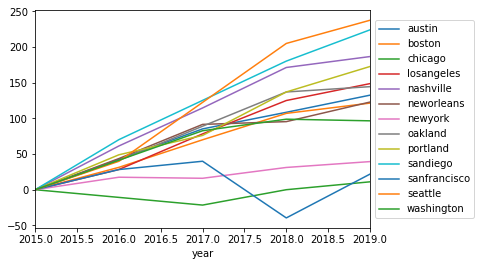

In [48]:
count_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [49]:
count_percentage_trend = count_percentage_trend[['newyork', 'losangeles', 'chicago','washington','boston','sanfrancisco','seattle','sandiego','portland','austin','nashville','neworleans']]
count_percentage_trend

category,newyork,losangeles,chicago,washington,boston,sanfrancisco,seattle,sandiego,portland,austin,nashville,neworleans
year,,,,,,,,,,,,
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,17.506537,28.325509,-10.772358,41.319149,31.349782,28.246984,39.817232,70.160116,48.931624,42.604502,61.302682,43.646409
2017,16.009033,78.221179,-21.544715,82.638298,69.956459,39.886444,122.389034,125.181951,76.068376,85.209003,114.559387,91.528545
2018,31.174233,124.986959,0.000000,98.808511,106.966618,-39.531583,204.960836,180.203785,136.965812,108.467310,171.264368,95.395948
2019,39.386736,148.669797,11.056911,96.510638,121.335269,21.859475,237.467363,224.017467,172.649573,132.475884,186.590038,122.836096


In [50]:
new_zillow_pct_trend_1b.rename(index = {"2015-06": 2015, 
                     "2016-06":2016,"2017-06":2017,"2018-06":2018,"2019-03":2019}, 
                                 inplace = True)

In [51]:
new_zillow_pct_trend_1b

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX","Nashville, TN","New Orleans, LA"
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,7.246377,2.150538,-0.857143,1.012658,5.903118,7.702265,0.154560,13.414634,8.629442,27.000000,3.913043
2017,-0.227273,14.115942,2.150538,2.571429,1.012658,6.609139,19.741100,9.489954,13.008130,10.659898,28.181818,0.000000
2018,-0.227273,17.971014,7.168459,2.857143,5.822785,3.196705,20.711974,18.701700,13.414634,18.680203,25.454545,-4.782609
2019,-2.272727,23.188406,14.336918,5.714286,6.329114,9.629339,18.220065,14.683153,13.414634,23.959391,26.636364,-5.478261


In [52]:
# pd.merge(new_zillow_pct_trend_1b, count_percentage_trend, left_index=True, right_index=True)


,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Washington, DC","Boston, MA","San Francisco, CA","Seattle, WA","San Diego, CA","Portland, OR","Austin, TX",...,chicago,washington,boston,sanfrancisco,seattle,sandiego,portland,austin,nashville,neworleans
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,7.246377,2.150538,-0.857143,1.012658,5.903118,7.702265,0.154560,13.414634,8.629442,...,-10.772358,41.319149,31.349782,28.246984,39.817232,70.160116,48.931624,42.604502,61.302682,43.646409
2017,-0.227273,14.115942,2.150538,2.571429,1.012658,6.609139,19.741100,9.489954,13.008130,10.659898,...,-21.544715,82.638298,69.956459,39.886444,122.389034,125.181951,76.068376,85.209003,114.559387,91.528545
2018,-0.227273,17.971014,7.168459,2.857143,5.822785,3.196705,20.711974,18.701700,13.414634,18.680203,...,0.000000,98.808511,106.966618,-39.531583,204.960836,180.203785,136.965812,108.467310,171.264368,95.395948
2019,-2.272727,23.188406,14.336918,5.714286,6.329114,9.629339,18.220065,14.683153,13.414634,23.959391,...,11.056911,96.510638,121.335269,21.859475,237.467363,224.017467,172.649573,132.475884,186.590038,122.836096


In [78]:
# new_zillow_pct_trend_1b.corrwith(count_percentage_trend['newyork'], axis = 0) 
print('New york',new_zillow_pct_trend_1b['New York, NY'].corr(count_percentage_trend['newyork']))
print('Los Angeles',new_zillow_pct_trend_1b['Los Angeles-Long Beach-Anaheim, CA'].corr(count_percentage_trend['losangeles']))
print('Chicago',new_zillow_pct_trend_1b['Chicago, IL'].corr(count_percentage_trend['chicago']))
print('Washington',new_zillow_pct_trend_1b['Washington, DC'].corr(count_percentage_trend['washington']))
print('Boston',new_zillow_pct_trend_1b['Boston, MA'].corr(count_percentage_trend['boston']))
print('San Francisco',new_zillow_pct_trend_1b['San Francisco, CA'].corr(count_percentage_trend['sanfrancisco']))
print('Seattle',new_zillow_pct_trend_1b['Seattle, WA'].corr(count_percentage_trend['seattle']))
print('San Diego',new_zillow_pct_trend_1b['San Diego, CA'].corr(count_percentage_trend['sandiego']))
print('Portland',new_zillow_pct_trend_1b['Portland, OR'].corr(count_percentage_trend['portland']))
print('Austin',new_zillow_pct_trend_1b['Austin, TX'].corr(count_percentage_trend['austin']))
print('Nashville',new_zillow_pct_trend_1b['Nashville, TN'].corr(count_percentage_trend['nashville']))
print('New Orleans',new_zillow_pct_trend_1b['New Orleans, LA'].corr(count_percentage_trend['neworleans']))


New york -0.7372270647336481
Los Angeles 0.9859340306523956
Chicago 0.6966314541028092
Washington 0.80155656368757
Boston 0.9194680652698576
San Francisco 0.5673426344318022
Seattle 0.8809433479759632
San Diego 0.9024898982180164
Portland 0.713359576694694
Austin 0.9726438053828418
Nashville 0.7400794757095881
New Orleans -0.6746236823558277


### We can see above description that the price on airbnb and the long term rental rate on zillow do not have obvious correlation between each of them in specific time

In [54]:
price_percentage_trend = price_trend.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
price_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,NaN,-7.372840,NaN,-2.881960,-10.947143,-1.478013,-5.427027,8.861375,1.268195,-18.274613,8.595171,-13.583387,NaN
2017,-2.837662,-8.112026,-11.56150,-1.462950,4.008776,-10.259776,-7.491722,NaN,0.928846,NaN,10.855660,NaN,48.476422
2018,-9.739958,5.795464,-16.18987,-2.950461,19.117590,-21.058213,-8.939172,5.227688,-0.928240,-22.817509,-18.126339,-0.047025,29.303038
2019,-15.696239,-7.926516,-14.16842,-3.431000,36.397839,-14.555319,-6.076467,7.987785,-5.212849,-22.735528,-16.683230,3.002850,17.449586


In [55]:
# price_percentage_trend.fillna(method='interpolate')
price_percentage_trend = price_percentage_trend.fillna((price_percentage_trend.shift() + price_percentage_trend.shift(-1))/2)
price_percentage_trend

category,austin,boston,chicago,losangeles,nashville,neworleans,newyork,oakland,portland,sandiego,sanfrancisco,seattle,washington
year,,,,,,,,,,,,,
2015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,-1.418831,-7.372840,-5.78075,-2.881960,-10.947143,-1.478013,-5.427027,8.861375,1.268195,-18.274613,8.595171,-13.583387,24.238211
2017,-2.837662,-8.112026,-11.56150,-1.462950,4.008776,-10.259776,-7.491722,7.044532,0.928846,-20.546061,10.855660,-6.815206,48.476422
2018,-9.739958,5.795464,-16.18987,-2.950461,19.117590,-21.058213,-8.939172,5.227688,-0.928240,-22.817509,-18.126339,-0.047025,29.303038
2019,-15.696239,-7.926516,-14.16842,-3.431000,36.397839,-14.555319,-6.076467,7.987785,-5.212849,-22.735528,-16.683230,3.002850,17.449586


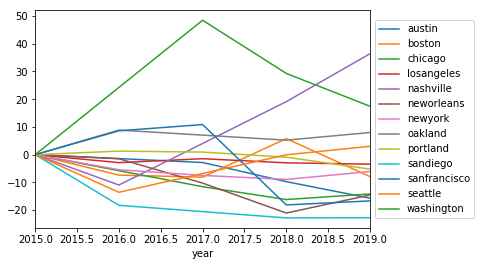

In [56]:
price_percentage_trend.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [79]:
# new_zillow_pct_trend_1b.corrwith(count_percentage_trend['newyork'], axis = 0) 
print('New york',new_zillow_pct_trend_1b['New York, NY'].corr(price_percentage_trend['newyork']))
print('Los Angeles',new_zillow_pct_trend_1b['Los Angeles-Long Beach-Anaheim, CA'].corr(price_percentage_trend['losangeles']))
print('Chicago',new_zillow_pct_trend_1b['Chicago, IL'].corr(price_percentage_trend['chicago']))
print('Washington',new_zillow_pct_trend_1b['Washington, DC'].corr(price_percentage_trend['washington']))
print('Boston',new_zillow_pct_trend_1b['Boston, MA'].corr(price_percentage_trend['boston']))
print('San Francisco',new_zillow_pct_trend_1b['San Francisco, CA'].corr(price_percentage_trend['sanfrancisco']))
print('Seattle',new_zillow_pct_trend_1b['Seattle, WA'].corr(price_percentage_trend['seattle']))
print('San Diego',new_zillow_pct_trend_1b['San Diego, CA'].corr(price_percentage_trend['sandiego']))
print('Portland',new_zillow_pct_trend_1b['Portland, OR'].corr(price_percentage_trend['portland']))
print('Austin',new_zillow_pct_trend_1b['Austin, TX'].corr(price_percentage_trend['austin']))
print('Nashville',new_zillow_pct_trend_1b['Nashville, TN'].corr(price_percentage_trend['nashville']))
print('New Orleans',new_zillow_pct_trend_1b['New Orleans, LA'].corr(price_percentage_trend['neworleans']))


New york 0.1743170097314974
Los Angeles -0.7818852818553359
Chicago -0.7231923093483871
Washington 0.22651315810410858
Boston 0.2398951216765637
San Francisco -0.09151975648578627
Seattle 0.19006504928749818
San Diego -0.7151895734215689
Portland -0.1809059167917771
Austin -0.9485711801983266
Nashville 0.26121653454808924
New Orleans 0.8331835394296175


### We can see above description that the price on airbnb and the long term rental rate on zillow do not have obvious correlation between each of them in specific time

In [57]:
total_1b_apt_list

,city,neighbourhood_cleansed,property_type,room_type,beds,price,zipcode,year,category
2,Chicago,Lincoln Square,House,Entire home/apt,1.0,85.0,60625,2015,chicago
8,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,100.0,60625,2015,chicago
16,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,85.0,60640,2015,chicago
19,Chicago,Lincoln Square,House,Entire home/apt,1.0,102.0,60640,2015,chicago
21,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
23,Chicago,Lincoln Square,Condominium,Entire home/apt,1.0,110.0,60625,2015,chicago
27,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,150.0,60625,2015,chicago
30,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,90.0,60625,2015,chicago
35,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,60.0,60625,2015,chicago
39,Chicago,Lincoln Square,Apartment,Entire home/apt,1.0,107.0,60625,2015,chicago


In [58]:
zillow_1b_zip_path = "/Users/jimmytsai/Downloads/Zip_MedianRentalPrice_1Bedroom.csv"
zillow_1b_zip = pd.read_csv(zillow_1b_zip_path,',')
zillow_1b_zip

,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,NaN,2600.0,2678.0,2675.5,...,3004.0,2950.0,2900.0,2950.0,2955.0,3000.0,3100.0,3150.0,3195.0,3219.5
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,NaN,NaN,NaN,NaN,...,1450.0,1450.0,1400.0,1370.0,1355.0,1350.0,1395.0,1450.0,1425.0,1470.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,2995.0,3025.0,3000.0,...,3300.0,3300.0,3300.0,3300.0,3300.0,3295.0,3300.0,3300.0,3300.0,3300.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,...,1178.0,1209.0,1209.0,1177.0,1245.0,1213.0,1144.0,1159.0,1159.0,1155.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,NaN,NaN,NaN,NaN,...,1595.0,1581.0,1600.0,1550.0,1550.0,1523.0,1600.0,1650.0,1650.0,1695.0
5,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,6,NaN,NaN,NaN,NaN,...,974.0,1055.0,1055.0,1025.0,1015.0,1000.5,970.0,969.0,956.0,999.0
6,10002,New York,NY,New York-Newark-Jersey City,New York County,7,NaN,NaN,NaN,NaN,...,2612.5,2650.0,2690.0,2695.0,2625.0,2600.0,2695.0,2625.0,2695.0,2749.0
7,10467,New York,NY,New York-Newark-Jersey City,Bronx County,8,NaN,NaN,NaN,NaN,...,1450.0,1450.0,1495.0,1500.0,1500.0,1450.0,1475.0,1500.0,1475.0,1475.0
8,60640,Chicago,IL,Chicago-Naperville-Elgin,Cook County,9,NaN,NaN,NaN,NaN,...,1260.0,1300.0,1275.0,1268.0,1250.0,1250.0,1295.0,1300.0,1325.0,1350.0
9,11226,New York,NY,New York-Newark-Jersey City,Kings County,10,NaN,NaN,NaN,NaN,...,1750.0,1775.0,1775.0,1750.0,1750.0,1750.0,1750.0,1775.0,1800.0,1800.0


In [59]:
total_1b_apt_zip_list = total_1b_apt_list[['price','zipcode','year']].groupby(['zipcode','year']).agg('mean').unstack()
total_1b_apt_zip_list

price                                                
year           2015        2016        2017        2018        2019
zipcode                                                            
10001.0         NaN         NaN  195.666667  327.500000  229.827586
10002.0         NaN         NaN  165.442308         NaN  199.422222
10003.0         NaN         NaN  200.750000  210.034091  215.931818
10004.0         NaN         NaN  232.500000  173.533333  195.125000
10005.0         NaN         NaN  210.428571  195.375000  250.633333
10006.0         NaN         NaN  150.000000  206.307692  192.750000
10007.0         NaN         NaN  243.000000  315.000000  283.823529
10009.0         NaN         NaN  180.712121  166.111111  176.775000
10010.0         NaN         NaN  180.583333  212.013333  213.692308
10011.0         NaN         NaN  230.116279  214.237288  261.851351
10012.0         NaN         NaN  188.795918  199.400000  224.608696
10013.0         NaN         NaN  203.700000  175.000000  239.333333
10014.0         NaN         NaN  211.824324  184.333333  279.034483
10016.0         NaN         NaN  175.024390  228.500000  208.032967
10017.0         NaN         NaN  240.600000         NaN  671.285714
10018.0         NaN         NaN  258.333333  168.666667  323.433333
10019.0         NaN         NaN  214.755102  210.216216  213.287879
10021.0         NaN         NaN  164.666667  225.000000  165.785714
10022.0         NaN         NaN  193.285714         NaN  214.000000
10023.0         NaN         NaN  227.512821         NaN  222.576923
10024.0         NaN         NaN  181.516129         NaN  176.714286
10025.0         NaN         NaN  164.410256         NaN  155.840000
10026.0         NaN         NaN  132.600000  130.068493  154.875000
10027.0         NaN         NaN  166.600000  136.635593  125.421053
10028.0         NaN         NaN  151.136364         NaN  184.965517
10029.0         NaN         NaN  135.434783         NaN  151.650000
10030.0         NaN         NaN  121.000000  132.018519  100.800000
10031.0         NaN         NaN  719.500000  110.633663  117.333333
10032.0         NaN         NaN   82.500000  114.250000  101.090909
10033.0         NaN         NaN  107.166667         NaN   85.571429
...             ...         ...         ...         ...         ...
97266           NaN         NaN         NaN         NaN   65.428571
98101           NaN  156.769231         NaN  191.211454         NaN
98102           NaN  112.586466         NaN  127.365079         NaN
98103           NaN  112.032258         NaN  110.078313         NaN
98104           NaN  130.425532         NaN  181.935673         NaN
98105           NaN   94.583333         NaN   96.615385         NaN
98106           NaN   72.416667         NaN   73.391304         NaN
98107           NaN  106.739130         NaN   96.102564         NaN
98108           NaN   90.875000         NaN   95.086957         NaN
98109           NaN  126.139535         NaN  133.859729         NaN
98112           NaN  111.254545         NaN  110.425287         NaN
98115           NaN  106.976744         NaN   96.097222         NaN
98116           NaN  101.058824         NaN  107.951220         NaN
98117           NaN   95.517241         NaN   97.095238         NaN
98118           NaN   92.966667         NaN   94.773585         NaN
98119           NaN  118.853659         NaN  127.422535         NaN
98121           NaN  132.797468         NaN  162.428571         NaN
98122           NaN  116.641221         NaN  146.306306         NaN
98125           NaN   97.000000         NaN   90.000000         NaN
98126           NaN  121.666667         NaN   87.055556         NaN
98133           NaN   86.125000         NaN   86.578947         NaN
98134           NaN  149.000000         NaN  373.000000         NaN
98136           NaN  105.636364         NaN  101.318182         NaN
98144           NaN   87.558824         NaN   95.328767         NaN
98146           NaN  100.000000         NaN   73.400000         NaN
98

In [60]:
total_1b_apt_zip_list.dtypes

       year
price  2015    float64
       2016    float64
       2017    float64
       2018    float64
       2019    float64
dtype: object

In [61]:
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list.index
# total_1b_apt_zip_list

In [62]:
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list['zipcode'].str[:5].replace(r'\s+', np.nan, regex=True).fillna(0).astype(int)

# total_1b_apt_zip_list.dtypes

In [63]:
total_1b_apt_list.dtypes

city                       object
neighbourhood_cleansed     object
property_type              object
room_type                  object
beds                      float64
price                     float64
zipcode                    object
year                        int64
category                   object
dtype: object

In [64]:
zillow_1b_zip.dtypes

RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
2010-09       float64
2010-10       float64
2010-11       float64
2010-12       float64
2011-01       float64
2011-02       float64
2011-03       float64
2011-04       float64
2011-05       float64
2011-06       float64
2011-07       float64
2011-08       float64
2011-09       float64
2011-10       float64
2011-11       float64
2011-12       float64
2012-01       float64
2012-02       float64
2012-03       float64
2012-04       float64
2012-05       float64
2012-06       float64
2012-07       float64
2012-08       float64
               ...   
2016-10       float64
2016-11       float64
2016-12       float64
2017-01       float64
2017-02       float64
2017-03       float64
2017-04       float64
2017-05       float64
2017-06       float64
2017-07       float64
2017-08       float64
2017-09       float64
2017-10       float64
2017-11       float64
2017-12   

In [65]:
# total_1b_apt_zip_list['zipcode'] = total_1b_apt_zip_list['zipcode'].str[:5].replace(r'\s+', np.nan, regex=True).fillna(0).astype(int)
# total_1b_apt_zip_list['zipcode']

In [66]:
total_1b_apt_zip_list

price                                                
year           2015        2016        2017        2018        2019
zipcode                                                            
10001.0         NaN         NaN  195.666667  327.500000  229.827586
10002.0         NaN         NaN  165.442308         NaN  199.422222
10003.0         NaN         NaN  200.750000  210.034091  215.931818
10004.0         NaN         NaN  232.500000  173.533333  195.125000
10005.0         NaN         NaN  210.428571  195.375000  250.633333
10006.0         NaN         NaN  150.000000  206.307692  192.750000
10007.0         NaN         NaN  243.000000  315.000000  283.823529
10009.0         NaN         NaN  180.712121  166.111111  176.775000
10010.0         NaN         NaN  180.583333  212.013333  213.692308
10011.0         NaN         NaN  230.116279  214.237288  261.851351
10012.0         NaN         NaN  188.795918  199.400000  224.608696
10013.0         NaN         NaN  203.700000  175.000000  239.333333
10014.0         NaN         NaN  211.824324  184.333333  279.034483
10016.0         NaN         NaN  175.024390  228.500000  208.032967
10017.0         NaN         NaN  240.600000         NaN  671.285714
10018.0         NaN         NaN  258.333333  168.666667  323.433333
10019.0         NaN         NaN  214.755102  210.216216  213.287879
10021.0         NaN         NaN  164.666667  225.000000  165.785714
10022.0         NaN         NaN  193.285714         NaN  214.000000
10023.0         NaN         NaN  227.512821         NaN  222.576923
10024.0         NaN         NaN  181.516129         NaN  176.714286
10025.0         NaN         NaN  164.410256         NaN  155.840000
10026.0         NaN         NaN  132.600000  130.068493  154.875000
10027.0         NaN         NaN  166.600000  136.635593  125.421053
10028.0         NaN         NaN  151.136364         NaN  184.965517
10029.0         NaN         NaN  135.434783         NaN  151.650000
10030.0         NaN         NaN  121.000000  132.018519  100.800000
10031.0         NaN         NaN  719.500000  110.633663  117.333333
10032.0         NaN         NaN   82.500000  114.250000  101.090909
10033.0         NaN         NaN  107.166667         NaN   85.571429
...             ...         ...         ...         ...         ...
97266           NaN         NaN         NaN         NaN   65.428571
98101           NaN  156.769231         NaN  191.211454         NaN
98102           NaN  112.586466         NaN  127.365079         NaN
98103           NaN  112.032258         NaN  110.078313         NaN
98104           NaN  130.425532         NaN  181.935673         NaN
98105           NaN   94.583333         NaN   96.615385         NaN
98106           NaN   72.416667         NaN   73.391304         NaN
98107           NaN  106.739130         NaN   96.102564         NaN
98108           NaN   90.875000         NaN   95.086957         NaN
98109           NaN  126.139535         NaN  133.859729         NaN
98112           NaN  111.254545         NaN  110.425287         NaN
98115           NaN  106.976744         NaN   96.097222         NaN
98116           NaN  101.058824         NaN  107.951220         NaN
98117           NaN   95.517241         NaN   97.095238         NaN
98118           NaN   92.966667         NaN   94.773585         NaN
98119           NaN  118.853659         NaN  127.422535         NaN
98121           NaN  132.797468         NaN  162.428571         NaN
98122           NaN  116.641221         NaN  146.306306         NaN
98125           NaN   97.000000         NaN   90.000000         NaN
98126           NaN  121.666667         NaN   87.055556         NaN
98133           NaN   86.125000         NaN   86.578947         NaN
98134           NaN  149.000000         NaN  373.000000         NaN
98136           NaN  105.636364         NaN  101.318182         NaN
98144           NaN   87.558824         NaN   95.328767         NaN
98146           NaN  100.000000         NaN   73.400000         NaN
98

In [67]:
# total_1b_apt_zip_list.reset_index()

In [68]:
# zipcode_data = zillow_1b_zip.merge(total_1b_apt_zip_list, how = 'left', left_on='RegionName', right_on='zipcode')
# zipcode_data

In [69]:
# zipcode_data.dtypes